In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
sympy.init_printing()

In [4]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 *t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t -2 * numpy.pi)**2 / (4* nu * (t+1))))
phi

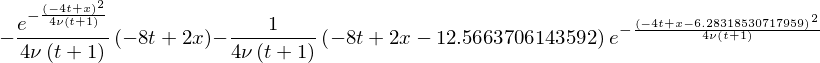

In [5]:
phiprime = phi.diff(x)
phiprime

In [6]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) +4

#print(u)

In [7]:
u_lamb = lambdify((t, x, nu), u)
print('the values of u at t = 1, x = 4, nu = 3, is {}'.format(u_lamb(1,4,3)))

the values of u at t = 1, x = 4, nu = 3, is 3.4917066420644494


Burgers' Equation

In [8]:
#parameters
nx = 101 #spatial grid points
L = 2.0 *numpy.pi #length of domain
dx = L / (nx -1) #spatial grid size
nu = 0.07 #viscosity
nt = 100 #time step #
sigma = 0.1 #CFL limit
dt = sigma * dx**2 / nu #time step size

#discretize
x = numpy.linspace(0.0, L, num = nx)


In [9]:
# Set initial conditions.
t = 0.0
u0 = numpy.array([u_lamb(t, xi, nu) for xi in x])
#u0

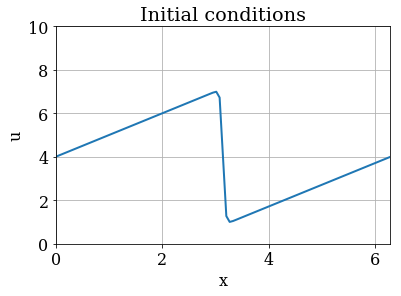

In [10]:
# Plot the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

#Integrate the Burgers' equation
u = u0.copy()
for n in range(nt):
    un = u.copy()
    #update interior points
    u[1:-1] = (un[1:-1] - un[1:-1] *dt/dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * un[2:] - 2 * (un[1:-1] + un[:-2]))
    #update boundary points
    u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-1]) +
            nu * dt/dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1]= (un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + 
            nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [11]:
# Integrate the Burgers' equation in time.
u = u0.copy()
for n in range(nt):
    un = u.copy()
    # Update all interior points.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    # Update boundary points.
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))




In [12]:
#compute analytical
u_analytical = numpy.array([u_lamb(nt * dt, xi, nu) for xi in x])

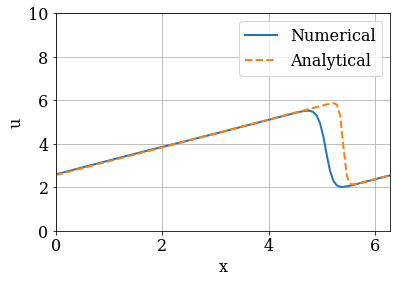

In [13]:
# Plot the numerical solution along with the analytical solution.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(x, u_analytical, label='Analytical',
            color='C1', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);

In [14]:
from matplotlib import animation
from IPython.display import HTML

In [15]:
def burgers(u0, dx, dt, nu, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        #update interior points
        u[1:-1] = (un[1:-1] - un[1:-1] * dt/dx *(un[1:-1] - un[:-2]) + 
                   nu * dt/dx**2 * (un[2:] - 2 * un[1:-1] +un[:-2]))
        #update boundary points
        u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-1]) +
                nu * dt/dx**2 * (un[1] - 2 * un[0] +un[-1]))
        u[-1]= (un[-1] - un[-1] * dt/dx * (un[-1] - u[-2]) +
                nu * dt/dx**2 * (un[0] - 2 * (un[0] - 2 * un[-1] + un[-2])))

In [16]:
#compute history numerical
u_hist = burgers(u0, dx, dt, nu, nt = nt)

In [17]:
#history analytical
u_analytical = [numpy.array([u_lamb(n * dt, xi, nu) for xi in x])
               for n in range(nt)]

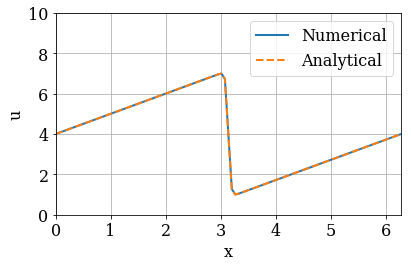

In [18]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
u0_analytical = numpy.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = pyplot.plot(x, u0, label='Numerical',
                    color='C0', linestyle='-', linewidth=2)[0]
line2 = pyplot.plot(x, u0_analytical, label='Analytical',
                    color='C1', linestyle='--', linewidth=2)[0]
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0)
fig.tight_layout()

In [19]:
def update_plot(n, u_hist, u_analytical):
    fig.suptitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [20]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist, u_analytical),
                               interval=100)

In [21]:
# Display the video.
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [ ]:
%%timeit
#set initial conditions
u = numpy.array([u_lamb(t, x0, nu) for x0 in x])
#integrate in time
for n in range (nt):
    un = u.copy()
    #update all interior points and the left boundary point
    for i in range(nx - 1):
        u[i] = (un[i] - un[i] * dt/dx * (un[i] - u[i - 1]) +
                nu * dt/dx**2 * (un[i+1] - 2 * un[i] + un[i-1]))
    #update right boundary
    u[-1] = (un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) +
             nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [ ]:
%%timeit
#inital conditions
u = numpy.array([u_lamb(t, xi, nu) for xi in x])
#integrate!
for n in range(nt):
    un = u.copy()
    #update interior points
    u[1:-1] = (un[1:-1] - un[1:-1]* dt/dx * (un[1:-1] - un[:-2]) + 
               nu * dt/dx**2 * (un[0] - 2 * un[-1] + un[-2]))
    #update boundary
    u[0] = (un[0] - un[0] * dt/dx * (un[0] - un[-1]) +
            nu * dt/dx**2 * (un[0] - 2 * un[0] + un[-1]))
    u[-1]= (un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + 
            nu * dt/dx**2 * (un[0] - 2 * un[-1] +un[-2]))